In [1]:
import numpy as np
import pandas as pd
import sys
import os
import importlib

sys.path.append(os.path.abspath("../base"))
import classify
import features
pd.set_option("display.max_columns", None)

In [17]:
importlib.reload(classify)  # Reload the classify module
importlib.reload(features)

<module 'features' from '/Users/kevinwong/Library/CloudStorage/GoogleDrive-kew024@ucsd.edu/My Drive/UCSD Winter Quarter 2025/dsc180b/dsc180b-capstone-q2/src/base/features.py'>

In [136]:
categories, consumer, acct, transactions = features.get_datasets()
transaction_categories = features.get_transaction_categories(transactions, categories)
all_features = features.one_hot_accounts(acct, consumer)

In [137]:
all_features = features.get_categorical_features2(
    all_features, transaction_categories, acct
)

In [ ]:
all_features

,prism_consumer_id,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,ACCOUNT_FEES_coef_variation,ATM_CASH_coef_variation,AUTOMOTIVE_coef_variation,AUTO_LOAN_coef_variation,BANKING_CATCH_ALL_coef_variation,BILLS_UTILITIES_coef_variation,BNPL_coef_variation,CORPORATE_PAYMENTS_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,DEBT_coef_variation,DEPOSIT_coef_variation,ENTERTAINMENT_coef_variation,ESSENTIAL_SERVICES_coef_variation,EXTERNAL_TRANSFER_coef_variation,FITNESS_coef_variation,FOOD_AND_BEVERAGES_coef_variation,GAMBLING_coef_variation,GENERAL_MERCHANDISE_coef_variation,GIFTS_DONATIONS_coef_variation,GOVERNMENT_SERVICES_coef_variation,GROCERIES_coef_variation,INSURANCE_coef_variation,INVESTMENT_coef_variation,INVESTMENT_INCOME_coef_variation,LEGAL_coef_variation,LOAN_coef_variation,MISCELLANEOUS_coef_variation,MORTGAGE_coef_variation,OTHER_BENEFITS_coef_variation,OVERDRAFT_coef_variation,PAYCHECK_coef_variation,PETS_coef_variation,REFUND_coef_variation,RENT_coef_variation,RISK_CATCH_ALL_coef_variation,RTO_LTO_coef_variation,SELF_TRANSFER_coef_variation,TAX_coef_variation,TIME_OR_STUFF_coef_variation,TRANSPORATION_coef_variation,TRAVEL_coef_variation,ACCOUNT_FEES_count,ATM_CASH_count,AUTOMOTIVE_count,AUTO_LOAN_count,BANKING_CATCH_ALL_count,BILLS_UTILITIES_count,BNPL_count,CORPORATE_PAYMENTS_count,CREDIT_CARD_PAYMENT_count,DEBT_count,DEPOSIT_count,ENTERTAINMENT_count,ESSENTIAL_SERVICES_count,EXTERNAL_TRANSFER_count,FITNESS_count,FOOD_AND_BEVERAGES_count,GAMBLING_count,GENERAL_MERCHANDISE_count,GIFTS_DONATIONS_count,GOVERNMENT_SERVICES_count,GROCERIES_count,INSURANCE_count,INVESTMENT_count,INVESTMENT_INCOME_count,LEGAL_count,LOAN_count,MISCELLANEOUS_count,MORTGAGE_count,OTHER_BENEFITS_count,OVERDRAFT_count,PAYCHECK_count,PETS_count,REFUND_count,RENT_count,RISK_CATCH_ALL_count,RTO_LTO_count,SELF_TRANSFER_count,TAX_count,TIME_OR_STUFF_count,TRANSPORATION_count,TRAVEL_count,ACCOUNT_FEES_iqr,ATM_CASH_iqr,AUTOMOTIVE_iqr,AUTO_LOAN_iqr,BANKING_CATCH_ALL_iqr,BILLS_UTILITIES_iqr,BNPL_iqr,CORPORATE_PAYMENTS_iqr,CREDIT_CARD_PAYMENT_iqr,DEBT_iqr,DEPOSIT_iqr,ENTERTAINMENT_iqr,ESSENTIAL_SERVICES_iqr,EXTERNAL_TRANSFER_iqr,FITNESS_iqr,FOOD_AND_BEVERAGES_iqr,GAMBLING_iqr,GENERAL_MERCHANDISE_iqr,GIFTS_DONATIONS_iqr,GOVERNMENT_SERVICES_iqr,GROCERIES_iqr,INSURANCE_iqr,INVESTMENT_iqr,INVESTMENT_INCOME_iqr,LEGAL_iqr,LOAN_iqr,MISCELLANEOUS_iqr,MORTGAGE_iqr,OTHER_BENEFITS_iqr,OVERDRAFT_iqr,PAYCHECK_iqr,PETS_iqr,REFUND_iqr,RENT_iqr,RISK_CATCH_ALL_iqr,RTO_LTO_iqr,SELF_TRANSFER_iqr,TAX_iqr,TIME_OR_STUFF_iqr,TRANSPORATION_iqr,TRAVEL_iqr,ACCOUNT_FEES_median,ATM_CASH_median,AUTOMOTIVE_median,AUTO_LOAN_median,BANKING_CATCH_ALL_median,BILLS_UTILITIES_median,BNPL_median,CORPORATE_PAYMENTS_median,CREDIT_CARD_PAYMENT_median,DEBT_median,DEPOSIT_median,ENTERTAINMENT_median,ESSENTIAL_SERVICES_median,EXTERNAL_TRANSFER_median,FITNESS_median,FOOD_AND_BEVERAGES_median,GAMBLING_median,GENERAL_MERCHANDISE_median,GIFTS_DONATIONS_median,GOVERNMENT_SERVICES_median,GROCERIES_median,INSURANCE_median,INVESTMENT_median,INVESTMENT_INCOME_median,LEGAL_median,LOAN_median,MISCELLANEOUS_median,MORTGAGE_median,OTHER_BENEFITS_median,OVERDRAFT_median,PAYCHECK_median,PETS_median,REFUND_median,RENT_median,RISK_CATCH_ALL_median,RTO_LTO_median,SELF_TRANSFER_median,TAX_median,TIME_OR_STUFF_median,TRANSPORATION_median,TRAVEL_median,ACCOUNT_FEES_skewness,ATM_CASH_skewness,AUTOMOTIVE_skewness,AUTO_LOAN_skewness,BANKING_CATCH_ALL_skewness,BILLS_UTILITIES_skewness,BNPL_skewness,CORPORATE_PAYME

In [139]:
all_features.to_csv('../../data_q2/features.csv', index = False)

In [7]:
all_features = pd.read_csv("../../data_q2/features.csv")
all_features = all_features.set_index('prism_consumer_id')

In [8]:
all_features

,evaluation_date,credit_score,DQ_TARGET,account_type_401K,account_type_AUTO,account_type_BROKERAGE,account_type_CASH MANAGEMENT,account_type_CD,account_type_CHECKING,account_type_CONSUMER,account_type_CREDIT CARD,account_type_HOME EQUITY,account_type_HSA,account_type_IRA,account_type_LINE OF CREDIT,account_type_LOAN,account_type_MONEY MARKET,account_type_MONEYMARKET,account_type_MORTGAGE,account_type_OTHER,account_type_OVERDRAFT,account_type_PREPAID,account_type_RETIREMENT,account_type_ROTH,account_type_SAVINGS,account_type_STOCK PLAN,account_type_STUDENT,ACCOUNT_FEES_coef_variation,ATM_CASH_coef_variation,AUTOMOTIVE_coef_variation,AUTO_LOAN_coef_variation,BANKING_CATCH_ALL_coef_variation,BILLS_UTILITIES_coef_variation,BNPL_coef_variation,CORPORATE_PAYMENTS_coef_variation,CREDIT_CARD_PAYMENT_coef_variation,DEBT_coef_variation,DEPOSIT_coef_variation,ENTERTAINMENT_coef_variation,ESSENTIAL_SERVICES_coef_variation,EXTERNAL_TRANSFER_coef_variation,FITNESS_coef_variation,FOOD_AND_BEVERAGES_coef_variation,GAMBLING_coef_variation,GENERAL_MERCHANDISE_coef_variation,GIFTS_DONATIONS_coef_variation,GOVERNMENT_SERVICES_coef_variation,GROCERIES_coef_variation,INSURANCE_coef_variation,INVESTMENT_coef_variation,INVESTMENT_INCOME_coef_variation,LEGAL_coef_variation,LOAN_coef_variation,MISCELLANEOUS_coef_variation,MORTGAGE_coef_variation,OTHER_BENEFITS_coef_variation,OVERDRAFT_coef_variation,PAYCHECK_coef_variation,PETS_coef_variation,REFUND_coef_variation,RENT_coef_variation,RISK_CATCH_ALL_coef_variation,RTO_LTO_coef_variation,SELF_TRANSFER_coef_variation,TAX_coef_variation,TIME_OR_STUFF_coef_variation,TRANSPORATION_coef_variation,TRAVEL_coef_variation,ACCOUNT_FEES_count,ATM_CASH_count,AUTOMOTIVE_count,AUTO_LOAN_count,BANKING_CATCH_ALL_count,BILLS_UTILITIES_count,BNPL_count,CORPORATE_PAYMENTS_count,CREDIT_CARD_PAYMENT_count,DEBT_count,DEPOSIT_count,ENTERTAINMENT_count,ESSENTIAL_SERVICES_count,EXTERNAL_TRANSFER_count,FITNESS_count,FOOD_AND_BEVERAGES_count,GAMBLING_count,GENERAL_MERCHANDISE_count,GIFTS_DONATIONS_count,GOVERNMENT_SERVICES_count,GROCERIES_count,INSURANCE_count,INVESTMENT_count,INVESTMENT_INCOME_count,LEGAL_count,LOAN_count,MISCELLANEOUS_count,MORTGAGE_count,OTHER_BENEFITS_count,OVERDRAFT_count,PAYCHECK_count,PETS_count,REFUND_count,RENT_count,RISK_CATCH_ALL_count,RTO_LTO_count,SELF_TRANSFER_count,TAX_count,TIME_OR_STUFF_count,TRANSPORATION_count,TRAVEL_count,ACCOUNT_FEES_iqr,ATM_CASH_iqr,AUTOMOTIVE_iqr,AUTO_LOAN_iqr,BANKING_CATCH_ALL_iqr,BILLS_UTILITIES_iqr,BNPL_iqr,CORPORATE_PAYMENTS_iqr,CREDIT_CARD_PAYMENT_iqr,DEBT_iqr,DEPOSIT_iqr,ENTERTAINMENT_iqr,ESSENTIAL_SERVICES_iqr,EXTERNAL_TRANSFER_iqr,FITNESS_iqr,FOOD_AND_BEVERAGES_iqr,GAMBLING_iqr,GENERAL_MERCHANDISE_iqr,GIFTS_DONATIONS_iqr,GOVERNMENT_SERVICES_iqr,GROCERIES_iqr,INSURANCE_iqr,INVESTMENT_iqr,INVESTMENT_INCOME_iqr,LEGAL_iqr,LOAN_iqr,MISCELLANEOUS_iqr,MORTGAGE_iqr,OTHER_BENEFITS_iqr,OVERDRAFT_iqr,PAYCHECK_iqr,PETS_iqr,REFUND_iqr,RENT_iqr,RISK_CATCH_ALL_iqr,RTO_LTO_iqr,SELF_TRANSFER_iqr,TAX_iqr,TIME_OR_STUFF_iqr,TRANSPORATION_iqr,TRAVEL_iqr,ACCOUNT_FEES_median,ATM_CASH_median,AUTOMOTIVE_median,AUTO_LOAN_median,BANKING_CATCH_ALL_median,BILLS_UTILITIES_median,BNPL_median,CORPORATE_PAYMENTS_median,CREDIT_CARD_PAYMENT_median,DEBT_median,DEPOSIT_median,ENTERTAINMENT_median,ESSENTIAL_SERVICES_median,EXTERNAL_TRANSFER_median,FITNESS_median,FOOD_AND_BEVERAGES_median,GAMBLING_median,GENERAL_MERCHANDISE_median,GIFTS_DONATIONS_median,GOVERNMENT_SERVICES_median,GROCERIES_median,INSURANCE_median,INVESTMENT_median,INVESTMENT_INCOME_median,LEGAL_median,LOAN_median,MISCELLANEOUS_median,MORTGAGE_median,OTHER_BENEFITS_median,OVERDRAFT_median,PAYCHECK_median,PETS_median,REFUND_median,RENT_median,RISK_CATCH_ALL_median,RTO_LTO_median,SELF_TRANSFER_median,TAX_median,TIME_OR_STUFF_median,TRANSPORATION_median,TRAVEL_median,ACCOUNT_FEES_skewness,ATM_CASH_skewness,AUTOMOTIVE_skewness,AUTO_LOAN_skewness,BANKING_CATCH_ALL_skewness,BILLS_UTILITIES_skewness,BNPL_skewness,CORPORATE_PAYMENTS_skewness,CREDI


Logistic Regression Results
ROC-AUC: 0.763 | Accuracy: 0.764
Training Time: 2.0s | Predicting Time: 0.000007s
              precision    recall  f1-score   support

         0.0       0.96      0.77      0.86      2416
         1.0       0.18      0.63      0.28       186

    accuracy                           0.76      2602
   macro avg       0.57      0.70      0.57      2602
weighted avg       0.91      0.76      0.82      2602



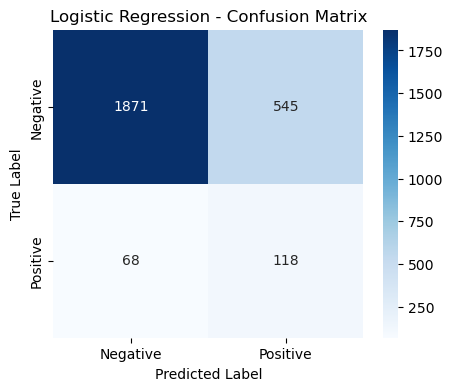


Random Forest Results
ROC-AUC: 0.802 | Accuracy: 0.920
Training Time: 18.3s | Predicting Time: 0.000037s
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2416
         1.0       0.34      0.13      0.19       186

    accuracy                           0.92      2602
   macro avg       0.64      0.55      0.57      2602
weighted avg       0.89      0.92      0.90      2602



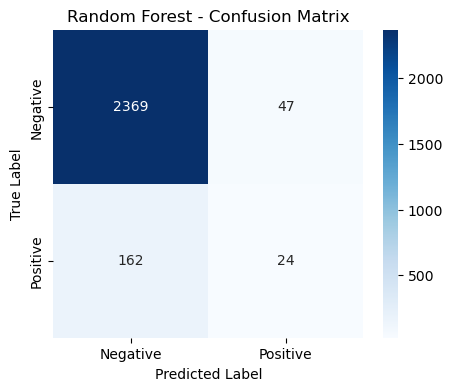


LightGBM Results
ROC-AUC: 0.826 | Accuracy: 0.913
Training Time: 2.6s | Predicting Time: 0.000013s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.27      0.13      0.17       186

    accuracy                           0.91      2602
   macro avg       0.60      0.55      0.56      2602
weighted avg       0.89      0.91      0.90      2602



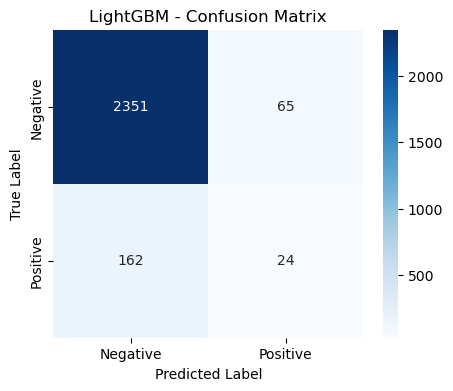


Balanced RF Results
ROC-AUC: 0.795 | Accuracy: 0.913
Training Time: 25.0s | Predicting Time: 0.000035s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      2416
         1.0       0.23      0.10      0.14       186

    accuracy                           0.91      2602
   macro avg       0.58      0.54      0.55      2602
weighted avg       0.88      0.91      0.90      2602



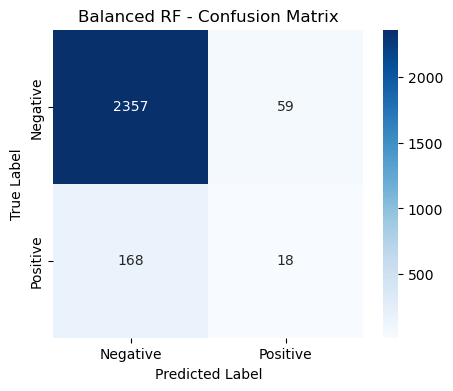


XGBoost Results
ROC-AUC: 0.822 | Accuracy: 0.907
Training Time: 3.7s | Predicting Time: 0.000005s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.24      0.14      0.18       186

    accuracy                           0.91      2602
   macro avg       0.59      0.55      0.56      2602
weighted avg       0.89      0.91      0.90      2602



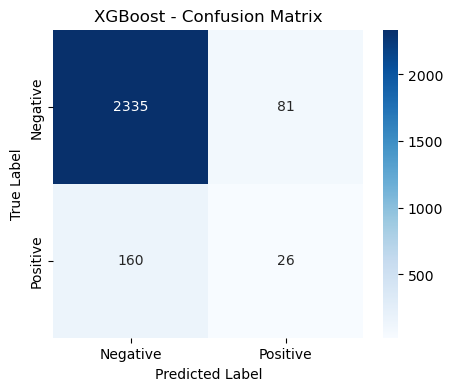


CatBoost Results
ROC-AUC: 0.819 | Accuracy: 0.917
Training Time: 29.3s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2416
         1.0       0.30      0.12      0.17       186

    accuracy                           0.92      2602
   macro avg       0.62      0.55      0.56      2602
weighted avg       0.89      0.92      0.90      2602



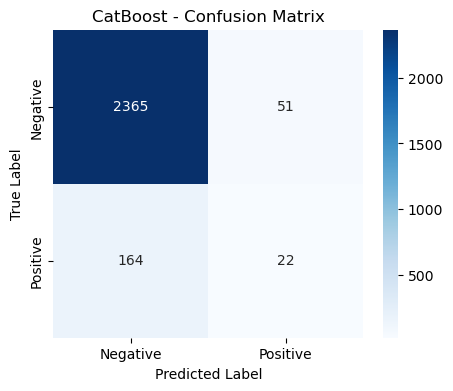


HistGB Results
ROC-AUC: 0.824 | Accuracy: 0.909
Training Time: 5.2s | Predicting Time: 0.000009s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.25      0.13      0.17       186

    accuracy                           0.91      2602
   macro avg       0.59      0.55      0.56      2602
weighted avg       0.89      0.91      0.90      2602



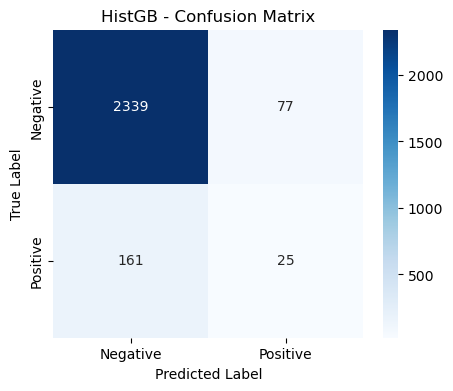


RUSBoost Results
ROC-AUC: 0.806 | Accuracy: 0.817
Training Time: 20.9s | Predicting Time: 0.000031s
              precision    recall  f1-score   support

         0.0       0.96      0.84      0.89      2416
         1.0       0.20      0.54      0.30       186

    accuracy                           0.82      2602
   macro avg       0.58      0.69      0.60      2602
weighted avg       0.91      0.82      0.85      2602



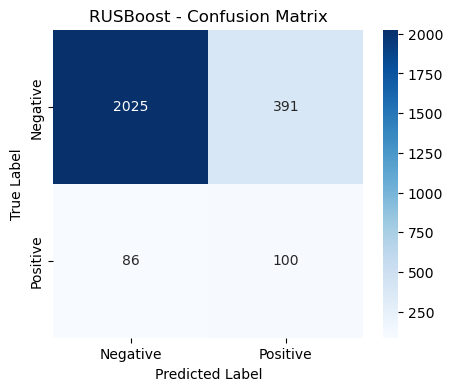


======================================== FINAL RESULTS ========================================
              model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
           LightGBM 0.826221  0.912759   0.887936 0.912759  0.898232    2.623227      0.000013
             HistGB 0.824300  0.908532   0.886241 0.908532  0.895974    5.193040      0.000009
            XGBoost 0.822230  0.907379   0.886342 0.907379  0.895637    3.737525      0.000005
           CatBoost 0.818592  0.917371   0.889847 0.917371  0.900290   29.289824      0.000009
           RUSBoost 0.806384  0.816679   0.905248 0.816679  0.851799   20.923607      0.000031
      Random Forest 0.801766  0.919677   0.893249 0.919677  0.902640   18.258450      0.000037
        Balanced RF 0.795125  0.912759   0.883448 0.912759  0.895643   25.009272      0.000035
Logistic Regression 0.762518  0.764412   0.908676 0.764412  0.817691    2.006327      0.000007


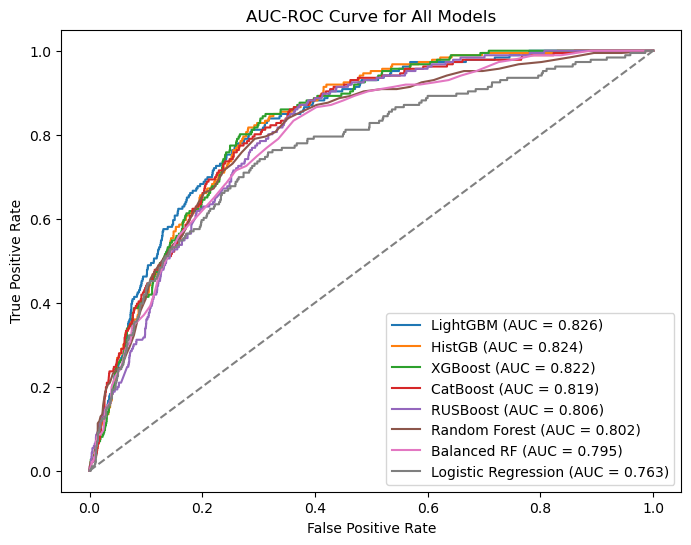

In [18]:
classification_features = (all_features.drop(columns = ['evaluation_date', 'DQ_TARGET'])).columns
classify.run_classification(classification_features, "DQ_TARGET", all_features)

In [11]:
classification_features = (
    all_features.drop(columns=["evaluation_date", "DQ_TARGET"])
).columns
best_features = classify.get_best_features(classification_features, 'DQ_TARGET', all_features, n_features = 100)


Top Features (RandomForestClassifier):
                           Feature  Importance  Correlation
                      credit_score    0.084670    -0.249976
                           balance    0.042912    -0.030563
              account_type_SAVINGS    0.035839    -0.099071
                  OVERDRAFT_median    0.020478     0.000407
               ACCOUNT_FEES_median    0.018770     0.001497
                   OVERDRAFT_count    0.017657     0.066101
                  ACCOUNT_FEES_std    0.015105    -0.000036
                ACCOUNT_FEES_count    0.013402     0.020680
                 SELF_TRANSFER_iqr    0.012631    -0.026766
                       BNPL_median    0.011362     0.011102
                          BNPL_std    0.011326     0.034083
                     OVERDRAFT_std    0.010846     0.014446
                        LOAN_count    0.010065     0.042468
                       LOAN_median    0.009489     0.002615
          ESSENTIAL_SERVICES_count    0.009168    -0.012371



Logistic Regression Results
ROC-AUC: 0.781 | Accuracy: 0.739
Training Time: 0.4s | Predicting Time: 0.000003s
              precision    recall  f1-score   support

         0.0       0.97      0.74      0.84      2416
         1.0       0.18      0.72      0.28       186

    accuracy                           0.74      2602
   macro avg       0.57      0.73      0.56      2602
weighted avg       0.91      0.74      0.80      2602



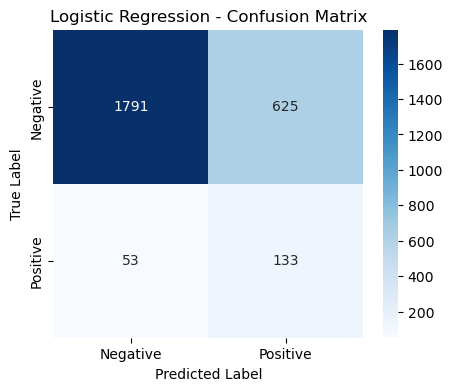


Random Forest Results
ROC-AUC: 0.790 | Accuracy: 0.912
Training Time: 16.5s | Predicting Time: 0.000033s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.30      0.17      0.21       186

    accuracy                           0.91      2602
   macro avg       0.62      0.57      0.58      2602
weighted avg       0.89      0.91      0.90      2602



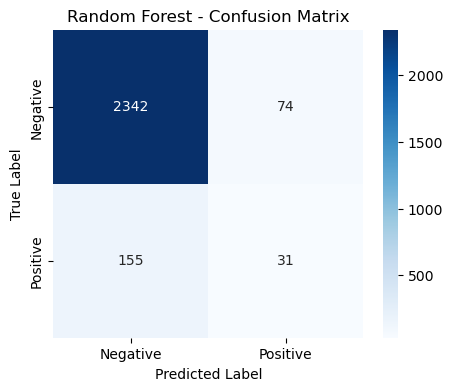


LightGBM Results
ROC-AUC: 0.821 | Accuracy: 0.911
Training Time: 1.4s | Predicting Time: 0.000012s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.28      0.16      0.20       186

    accuracy                           0.91      2602
   macro avg       0.61      0.56      0.58      2602
weighted avg       0.89      0.91      0.90      2602



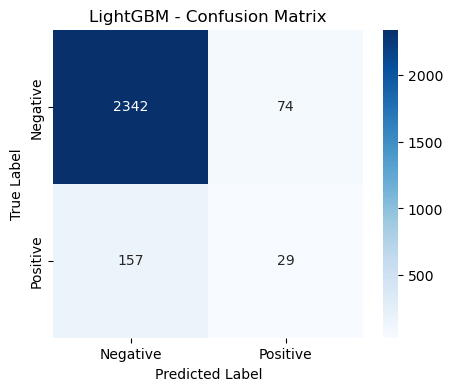


Balanced RF Results
ROC-AUC: 0.790 | Accuracy: 0.907
Training Time: 21.3s | Predicting Time: 0.000035s
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      2416
         1.0       0.25      0.15      0.19       186

    accuracy                           0.91      2602
   macro avg       0.59      0.56      0.57      2602
weighted avg       0.89      0.91      0.90      2602



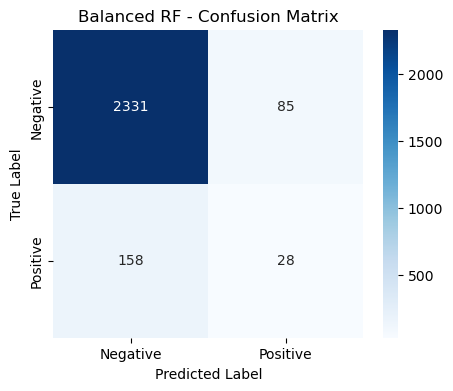


XGBoost Results
ROC-AUC: 0.821 | Accuracy: 0.908
Training Time: 2.0s | Predicting Time: 0.000005s
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      2416
         1.0       0.28      0.18      0.22       186

    accuracy                           0.91      2602
   macro avg       0.61      0.57      0.58      2602
weighted avg       0.89      0.91      0.90      2602



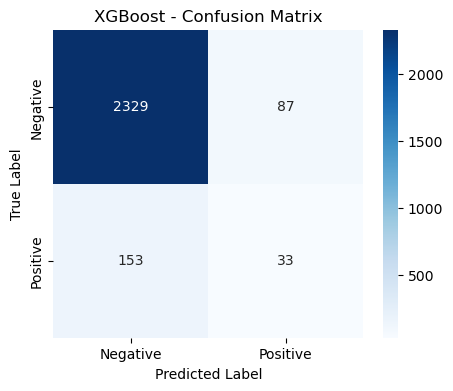


CatBoost Results
ROC-AUC: 0.815 | Accuracy: 0.914
Training Time: 14.9s | Predicting Time: 0.000006s
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      2416
         1.0       0.26      0.11      0.15       186

    accuracy                           0.91      2602
   macro avg       0.60      0.54      0.55      2602
weighted avg       0.89      0.91      0.90      2602



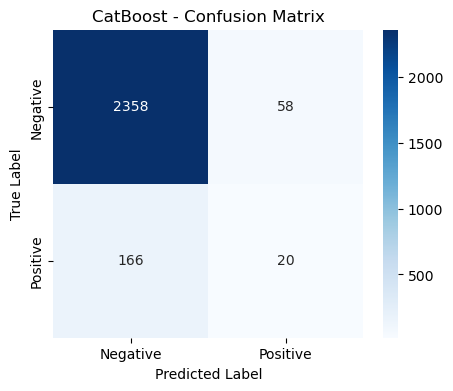


HistGB Results
ROC-AUC: 0.817 | Accuracy: 0.908
Training Time: 3.3s | Predicting Time: 0.000015s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.24      0.13      0.17       186

    accuracy                           0.91      2602
   macro avg       0.59      0.55      0.56      2602
weighted avg       0.89      0.91      0.90      2602



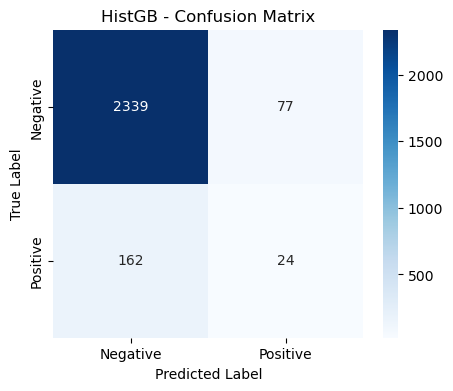


RUSBoost Results
ROC-AUC: 0.805 | Accuracy: 0.812
Training Time: 11.3s | Predicting Time: 0.000013s
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      2416
         1.0       0.20      0.54      0.29       186

    accuracy                           0.81      2602
   macro avg       0.58      0.69      0.59      2602
weighted avg       0.90      0.81      0.85      2602



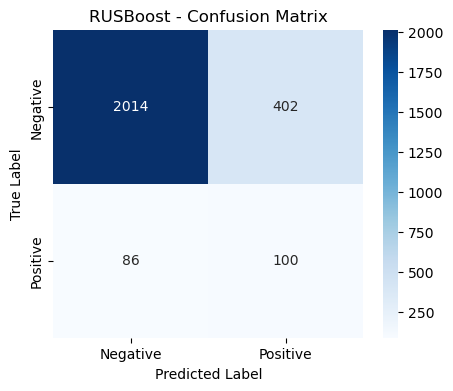


======================================== FINAL RESULTS ========================================
              model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
            XGBoost 0.821209  0.907763   0.890937 0.907763  0.898438    1.985028      0.000005
           LightGBM 0.820514  0.911222   0.890309 0.911222  0.899223    1.393370      0.000012
             HistGB 0.817458  0.908148   0.885359 0.908148  0.895340    3.290113      0.000015
           CatBoost 0.815228  0.913912   0.885778 0.913912  0.897245   14.944741      0.000006
           RUSBoost 0.804902  0.812452   0.904731 0.812452  0.848961   11.349752      0.000013
      Random Forest 0.790239  0.911991   0.891984 0.911991  0.900468   16.544783      0.000033
        Balanced RF 0.789730  0.906610   0.887288 0.906610  0.895905   21.302784      0.000035
Logistic Regression 0.781227  0.739431   0.914372 0.739431  0.800881    0.401089      0.000003


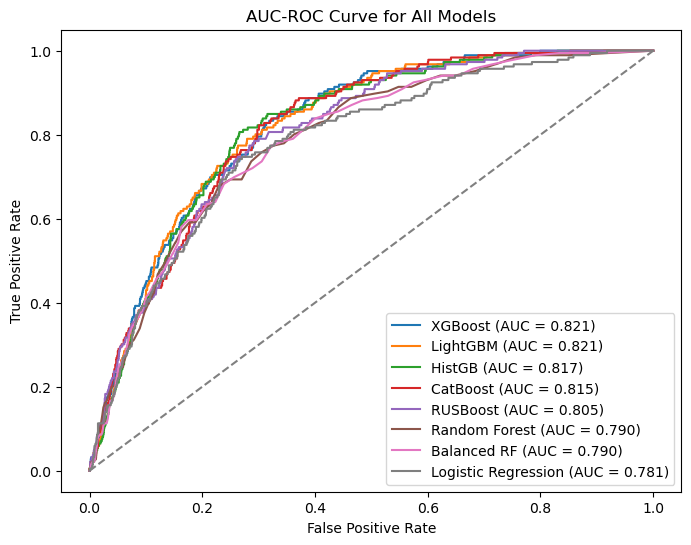

In [12]:
classify.run_classification(best_features[0], "DQ_TARGET", all_features)



Logistic Regression Results
ROC-AUC: 0.777 | Accuracy: 0.743
Training Time: 0.3s | Predicting Time: 0.000003s
              precision    recall  f1-score   support

         0.0       0.97      0.75      0.84      2416
         1.0       0.17      0.68      0.27       186

    accuracy                           0.74      2602
   macro avg       0.57      0.71      0.56      2602
weighted avg       0.91      0.74      0.80      2602



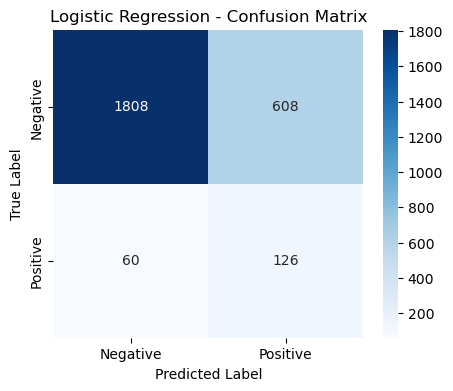


Random Forest Results
ROC-AUC: 0.800 | Accuracy: 0.915
Training Time: 14.4s | Predicting Time: 0.000088s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      2416
         1.0       0.32      0.16      0.21       186

    accuracy                           0.92      2602
   macro avg       0.63      0.56      0.58      2602
weighted avg       0.89      0.92      0.90      2602



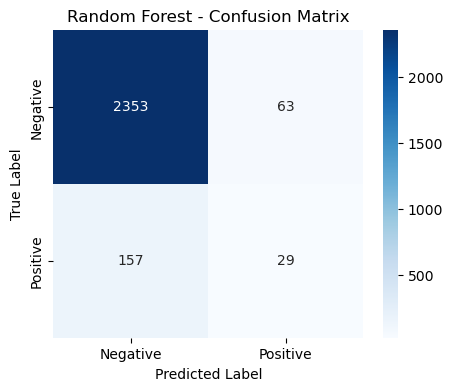


LightGBM Results
ROC-AUC: 0.832 | Accuracy: 0.914
Training Time: 2.2s | Predicting Time: 0.000018s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.28      0.13      0.18       186

    accuracy                           0.91      2602
   macro avg       0.61      0.55      0.57      2602
weighted avg       0.89      0.91      0.90      2602



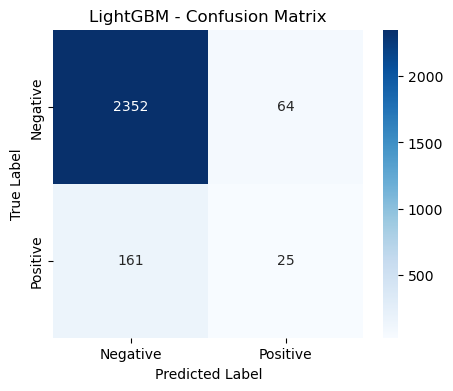


Balanced RF Results
ROC-AUC: 0.800 | Accuracy: 0.914
Training Time: 13.7s | Predicting Time: 0.000034s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.29      0.13      0.18       186

    accuracy                           0.91      2602
   macro avg       0.61      0.55      0.57      2602
weighted avg       0.89      0.91      0.90      2602



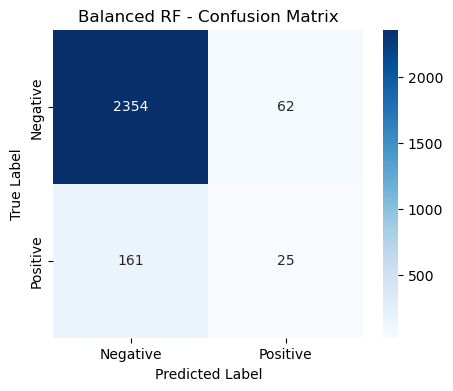


XGBoost Results
ROC-AUC: 0.818 | Accuracy: 0.914
Training Time: 1.6s | Predicting Time: 0.000006s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.31      0.16      0.21       186

    accuracy                           0.91      2602
   macro avg       0.62      0.57      0.58      2602
weighted avg       0.89      0.91      0.90      2602



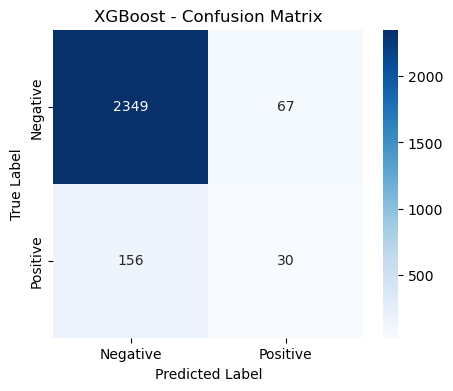


CatBoost Results
ROC-AUC: 0.821 | Accuracy: 0.917
Training Time: 14.5s | Predicting Time: 0.000005s
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      2416
         1.0       0.32      0.15      0.20       186

    accuracy                           0.92      2602
   macro avg       0.63      0.56      0.58      2602
weighted avg       0.89      0.92      0.90      2602



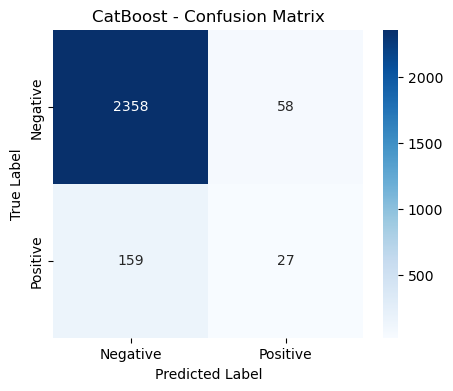


HistGB Results
ROC-AUC: 0.823 | Accuracy: 0.913
Training Time: 3.2s | Predicting Time: 0.000021s
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2416
         1.0       0.30      0.16      0.21       186

    accuracy                           0.91      2602
   macro avg       0.62      0.57      0.58      2602
weighted avg       0.89      0.91      0.90      2602



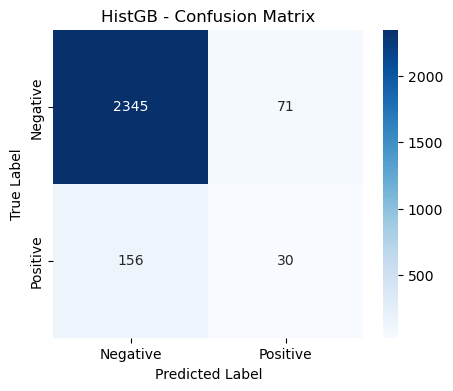


RUSBoost Results
ROC-AUC: 0.802 | Accuracy: 0.829
Training Time: 7.0s | Predicting Time: 0.000012s
              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      2416
         1.0       0.21      0.49      0.29       186

    accuracy                           0.83      2602
   macro avg       0.58      0.67      0.60      2602
weighted avg       0.90      0.83      0.86      2602



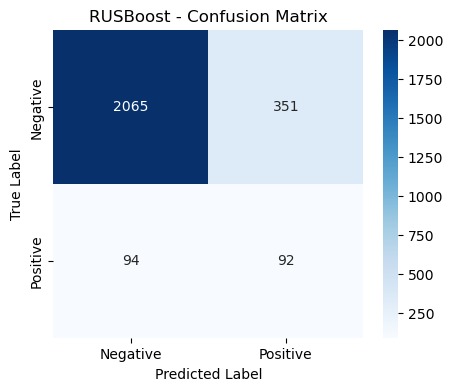


======================================== FINAL RESULTS ========================================
              model  roc_auc  accuracy  precision   recall  f1-score  train_time  predict_time
           LightGBM 0.832238  0.913528   0.889109 0.913528  0.899128    2.207812      0.000018
             HistGB 0.822790  0.912759   0.891833 0.912759  0.900595    3.195762      0.000021
           CatBoost 0.821119  0.916603   0.892568 0.916603  0.901916   14.511365      0.000005
            XGBoost 0.817867  0.914297   0.892801 0.914297  0.901595    1.634547      0.000006
           RUSBoost 0.801726  0.828978   0.902935 0.828978  0.859113    6.954459      0.000012
        Balanced RF 0.799938  0.914297   0.889618 0.914297  0.899617   13.669721      0.000034
      Random Forest 0.799520  0.915450   0.892971 0.915450  0.901962   14.364438      0.000088
Logistic Regression 0.776687  0.743274   0.910964 0.743274  0.803314    0.348290      0.000003


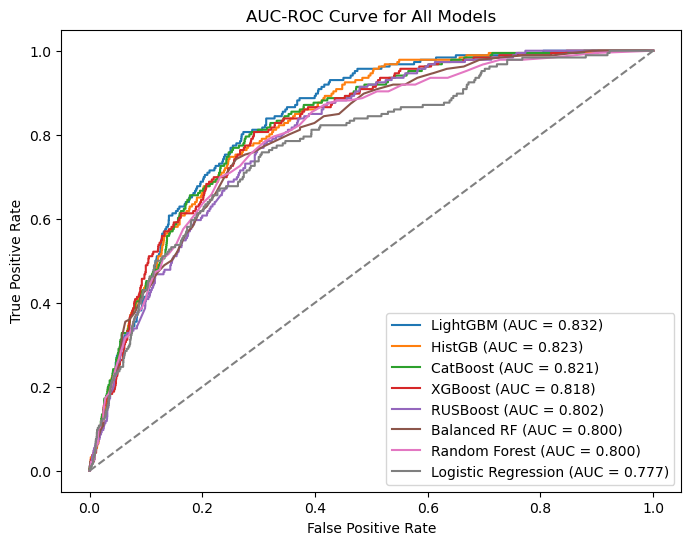

In [13]:
classify.run_classification(best_features[2], "DQ_TARGET", all_features)


In [14]:
classify.individual_test(best_features[2], all_features)

FileNotFoundError: [Errno 2] No such file or directory: 'Random Forest.joblib'